# Image segmentation using Expectation-Maximization

## Prerequisites

- NumPy
- Matplotlib
- SciPy

In [27]:
from matplotlib.image import imread
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from EM import EM
from extractFeature import *

## Read Image

In [2]:
%cd ./pic segmentation

D:\codes\jupyter_prj\pic segmentation


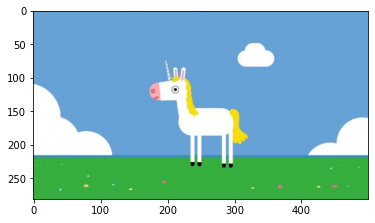

In [25]:
file = 'images/unicorn.jpg'
img = imread(file)
plt.imshow(img)
x,y = img.shape[:-1]

## Smoothing Image

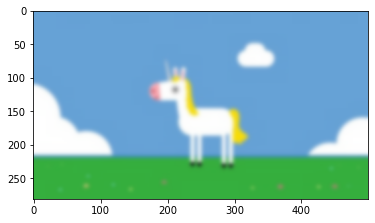

In [7]:
sigma = 3
filtered_img = gaussian_filter(img, sigma=(sigma, sigma,0))
plt.imshow(filtered_img)

## Extract Features

In [14]:
# Wenjuan's Part: find the optimal value of weight

feature = norm_and_extract_features(filtered_img)

## Expectation-Maximization with Gaussian Mixture Model

In [15]:
k = 4
em = EM()
res = em.fit(k, feature)

D:\codes\jupyter_prj\pic segmentation\EM.py:8: RuntimeWarning: overflow encountered in double_scalars
  product = product * likelihood[i][likelihood_index[i]]
D:\codes\jupyter_prj\pic segmentation\EM.py:82: RuntimeWarning: invalid value encountered in double_scalars
  if np.abs((new_log_likelihood - old_log_likelihood) / old_log_likelihood) < 0.2:


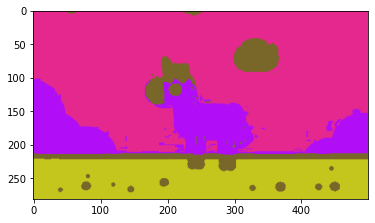

In [26]:
random_label_color = np.random.randint(256,size=(k,3))

clustered_img = np.ndarray(shape=img.shape, dtype=int)

for i in range(len(res)):
    cluster = res[i]
    for j in range(len(cluster)):
        y_index = int(cluster[j] % y)
        x_index = int((cluster[j] - y_index) / y)
        clustered_img[x_index][y_index] = random_label_color[i]

plt.imshow(clustered_img)